# **START**

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from vipbege.pulse import Pulse
from vipbege.pulse_batch import PulseGenerator, PulseBatch, 

# **2021 Data**

## load data

In [ ]:
with open('path/to/data', 'rb') as f:
    df21 = pickle.load(f)

## **Rise time**

### single pulse ###

In [ ]:
i=np.random.choice(len(df21))
print(i)
pulse_data21 = df21.iloc[i]['original_pulse']

pulse21 = Pulse(pulse_data21)
trise21 = pulse21.find_rise_time()
trise21

10714


(0.265, 0.5025000000000001, 0.7675000000000001)

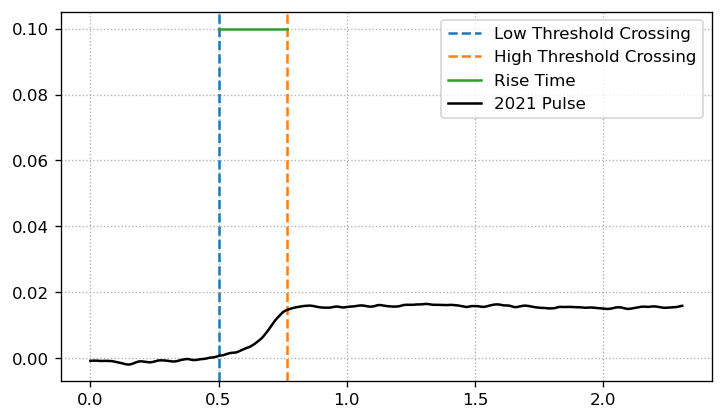

In [142]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(trise21[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(trise21[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([trise21[1], trise21[1] + trise21[0]], [0.1, 0.1], color='C2', label='Rise Time')

ax.plot(pulse21.time, pulse21.data, label='2021 Pulse', color='black')

ax.legend()

### pulse batch

In [143]:
pulses_data21 = np.stack(df21['original_pulse'])
pulses21 = PulseBatch(pulses_data21)
pulses_data21.shape

(22377, 924)

In [144]:
tsrise21 = pulses21.find_rise_time()
print(tsrise21[0][i], tsrise21[1][i], tsrise21[2][i])

0.265 0.5025000000000001 0.7675000000000001


## **Peak/FWHM Time**

### peak time

#### single pulse

In [145]:
pulse21 = Pulse(pulse_data21)
*tpeak21, peakNorm21 = pulse21.find_peak_fwhm_time(return_norm=True)
tpeak21

[0.04124235586282865, 0.6823140188393131, 0.7235563747021417]

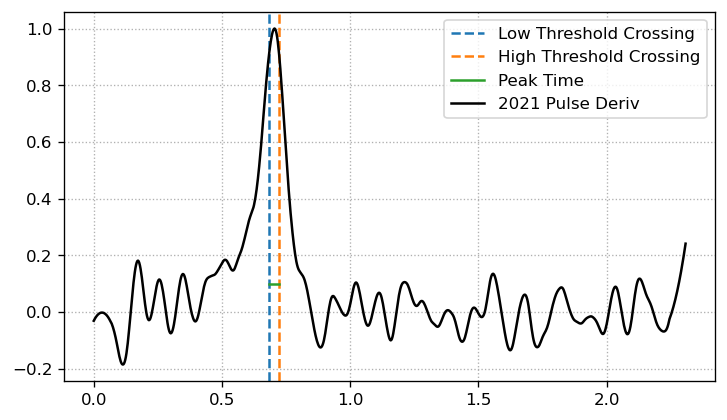

In [146]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tpeak21[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tpeak21[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tpeak21[1], tpeak21[1] + tpeak21[0]], [0.1, 0.1], color='C2', label='Peak Time')

ax.plot(pulse21.time, peakNorm21, label='2021 Pulse Deriv', color='black')

ax.legend()

#### pulse batch

In [147]:
*tspeak21, peakNorms21 = pulses21.find_peak_fwhm_time(return_norm=True)
tspeak21[0][i],tspeak21[1][i],tspeak21[2][i]

(0.04124235586282865, 0.6823140188393131, 0.7235563747021417)

### fwhm time

#### single pulse

In [148]:
pulse21 = Pulse(pulse_data21)
*tfwhm21, fwhmNorm21 = pulse21.find_peak_fwhm_time(type='fwhm', return_norm=True)
tfwhm21

[0.11099027254479754, 0.6434352263888441, 0.7544254989336416]

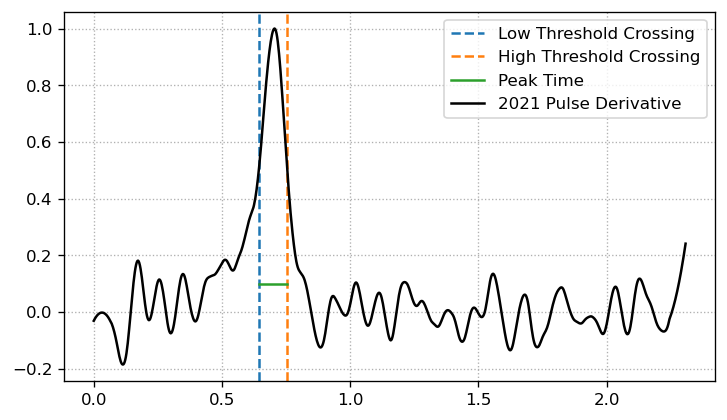

In [149]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tfwhm21[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tfwhm21[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tfwhm21[1], tfwhm21[1] + tfwhm21[0]], [0.1, 0.1], color='C2', label='Peak Time')

ax.plot(pulse21.time, fwhmNorm21, label='2021 Pulse Derivative', color='black')

ax.legend()

#### pulse batch

In [150]:
*tsfwhm21, _ = pulses21.find_peak_fwhm_time(type='fwhm', return_norm=True)
tsfwhm21[0][i],tsfwhm21[1][i],tsfwhm21[2][i]

(0.11099027254479754, 0.6434352263888441, 0.7544254989336416)

## **Normalize pulse**

#### single pulse

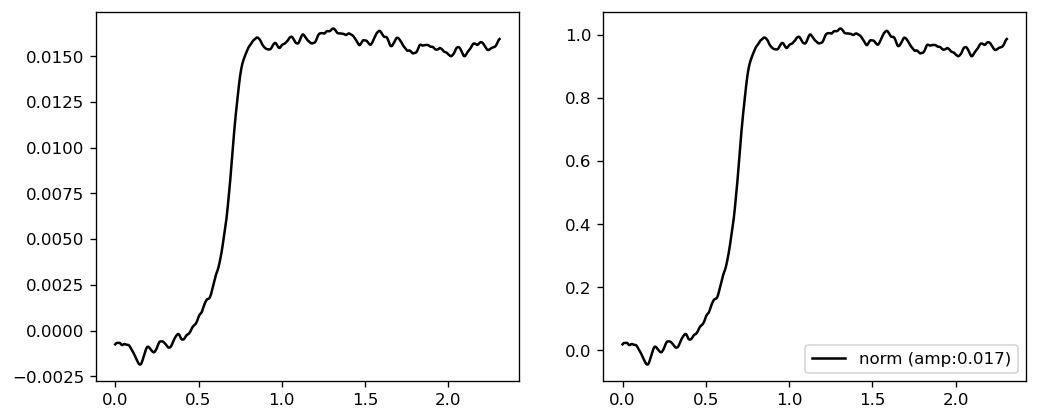

In [ ]:
pulse21 = Pulse(pulse_data21)
norm21, amp = pulse21.normalize_pulse(return_amp=True)

fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulse21.time, pulse21.data, color='black')
ax[1].plot(pulse21.time, norm21, label=f'norm (amp:{amp:.3f})', color='black')
ax[1].legend()

#### pulse batch

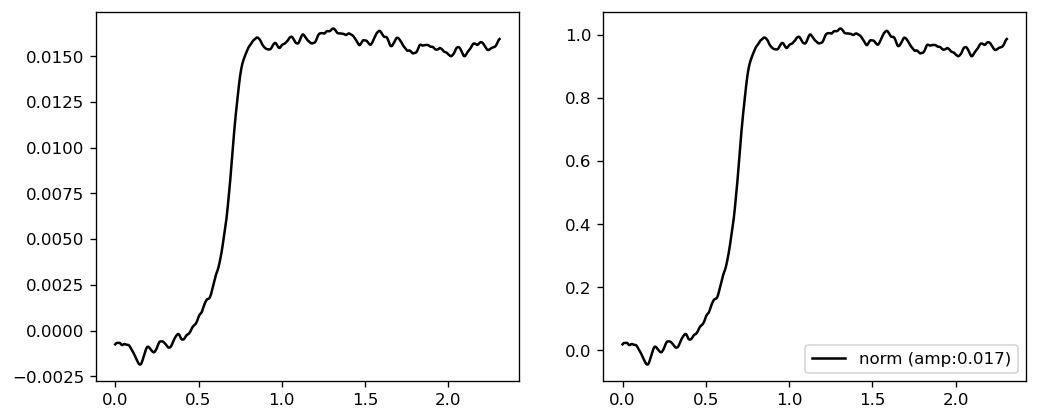

In [152]:
norms21, amps = pulses21.normalize_pulse(return_amp=True)
fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulses21.time, pulses21.data[i], color='black')
ax[1].plot(pulses21.time, norms21[i], label=f'norm (amp:{amps[i]:.3f})', color='black')
ax[1].legend()

## **find peaks**

### single pulse

In [153]:
pulse21 = Pulse(pulse_data21)
peaks21 = pulse21.count_peaks()
peaks21

1

### pulse batch

In [154]:
peakss21 = pulses21.count_peaks()
peakss21[i]

1

## **L1 norm**

### single pulse

In [155]:
pulse_ref21 = Pulse(df21.iloc[4154]['original_pulse'])
pulse21 = Pulse(pulse_data21)
l1_norm21 = pulse21.l1_norm(reference_pulse=pulse_ref21)
l1_norm21

12.689951673483058

### pulse batch

In [156]:
l1_norms21 = pulses21.l1_norm(reference_pulse=pulse_ref21)
l1_norms21[i]

12.689951673483058

## **Normalize derivative**

### single pulse

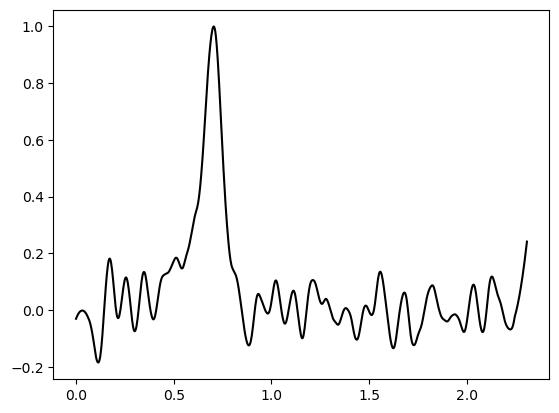

In [157]:
pulse21 = Pulse(pulse_data21)
deriv21 = pulse21.normalize_deriv()
plt.plot(pulse21.time, deriv21, color='black')
plt.show()

### pulse batch

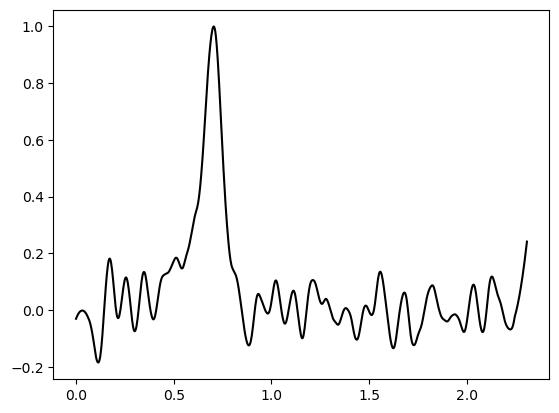

In [158]:
derivs21 = pulses21.normalize_deriv()
plt.plot(pulse21.time, derivs21[i], color='black')
plt.show()

# **2022 Data**

## load data

In [ ]:
df22 = pd.read_csv("path/to/data")
df22

## **Rise time**

### single pulse

In [ ]:
j=np.random.choice(len(df22))
print(j)
pulse_data22 = df22.iloc[j].values
pulse22 = Pulse(pulse_data22)
trise22 = pulse22.find_rise_time()
trise22

26846


(0.27249999999999996, 0.8325, 1.105)

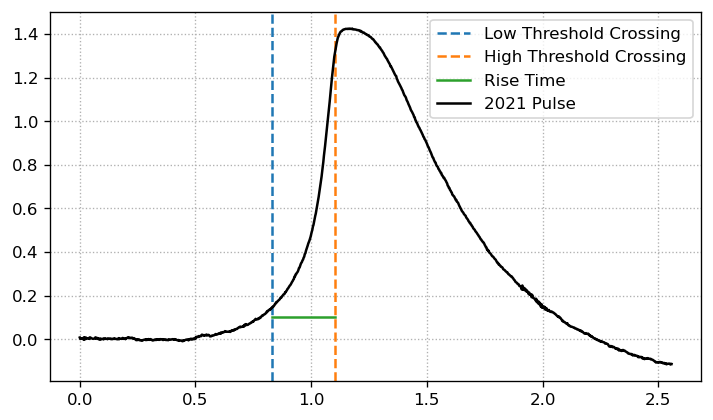

In [161]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(trise22[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(trise22[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([trise22[1], trise22[1] + trise22[0]], [0.1, 0.1], color='C2', label='Rise Time')

ax.plot(pulse22.time, pulse22.data, label='2021 Pulse', color='black')

ax.legend()

### pulse batch

In [162]:
pulses_data22 = np.stack(df22.to_numpy())
pulses22 = PulseBatch(pulses_data22)
pulses_data22.shape

(31075, 1024)

In [163]:
tsrise22 = pulses22.find_rise_time()
print(tsrise22[0][j], tsrise22[1][j], tsrise22[2][j])

0.27249999999999996 0.8325 1.105


## **Decay time**

### single pulse

In [164]:
tdecay = pulse22.find_decay_time()
tdecay

(0.6850000000000003, 1.3275, 2.0125)

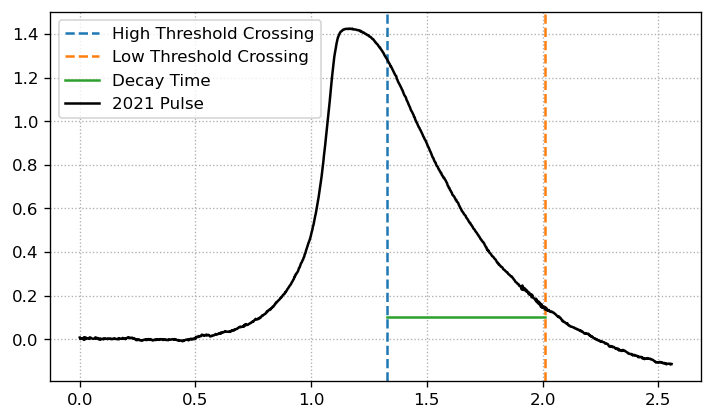

In [165]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tdecay[1], color='C0', linestyle='--', label='High Threshold Crossing')
ax.axvline(tdecay[2], color='C1', linestyle='--', label='Low Threshold Crossing')
ax.plot([tdecay[1], tdecay[1] + tdecay[0]], [0.1, 0.1], color='C2', label='Decay Time')

ax.plot(pulse22.time, pulse22.data, label='2021 Pulse', color='black')

ax.legend()

### pulse batch

In [166]:
tsdecay = pulses22.find_decay_time()
tsdecay[0][j], tsdecay[1][j], tsdecay[2][j]

(0.6850000000000003, 1.3275, 2.0125)

## **Peak/FWHM time**

### peak time

#### single pulse

In [ ]:
*tpeak22, peakNorm22 = pulse22.find_peak_fwhm_time(peak_deriv=False, time_space='pulse', return_norm=True)
tpeak22

[0.2378096537839378, 1.0971393402836402, 1.334948994067578]

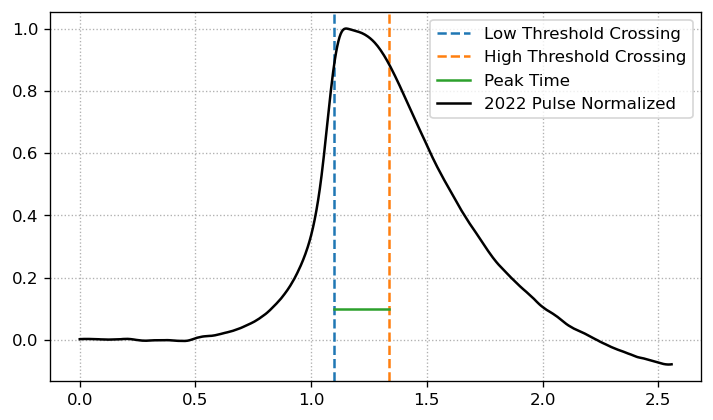

In [168]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tpeak22[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tpeak22[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tpeak22[1], tpeak22[1] + tpeak22[0]], [0.1, 0.1], color='C2', label='Peak Time')

ax.plot(pulse22.time, peakNorm22, label='2022 Pulse Normalized', color='black')

ax.legend()

#### pulse batch

In [169]:
*tspeak22, _ = pulses22.find_peak_fwhm_time(peak_deriv=False, time_space='pulse', return_norm=True)
tspeak22[0][j], tspeak22[1][j], tspeak22[2][j]

(0.2378096537839378, 1.0971393402836402, 1.334948994067578)

### fwhm time

#### single pulse

In [ ]:
*tfwhm22, fwhmNorm22 = pulse22.find_peak_fwhm_time(type='fwhm', peak_deriv=False, time_space='pulse', return_norm=True)
tfwhm22

[0.5853221738894854, 1.032605451233184, 1.6179276251226693]

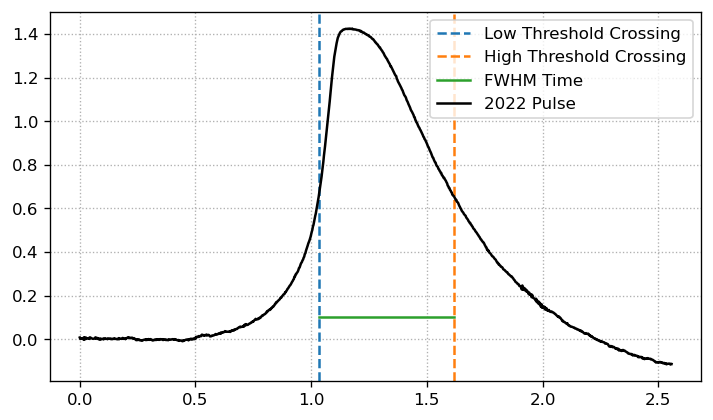

In [171]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=120)
ax.grid(ls=":")

ax.axvline(tfwhm22[1], color='C0', linestyle='--', label='Low Threshold Crossing')
ax.axvline(tfwhm22[2], color='C1', linestyle='--', label='High Threshold Crossing')
ax.plot([tfwhm22[1], tfwhm22[1] + tfwhm22[0]], [0.1, 0.1], color='C2', label='FWHM Time')

ax.plot(pulse22.time, pulse22.data, label='2022 Pulse', color='black')

ax.legend()

#### pulse batch

In [172]:
tsfwhm22 = pulses22.find_peak_fwhm_time(type='fwhm', peak_deriv=False, time_space='pulse', return_norm=False)
tsfwhm22[0][j], tsfwhm22[1][j], tsfwhm22[2][j]

(0.5853221738894854, 1.032605451233184, 1.6179276251226693)

## **Normalize pulse**

#### single pulse

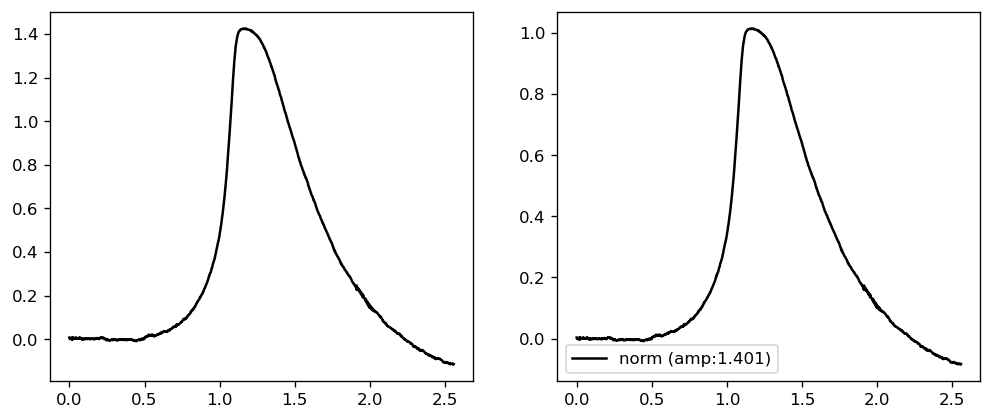

In [ ]:
norm22, amp = pulse22.normalize_pulse(return_amp=True)

fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulse22.time, pulse22.data, color='black')
ax[1].plot(pulse22.time, norm22, label=f'norm (amp:{amp:.3f})', color='black')
ax[1].legend()

#### pulse batch

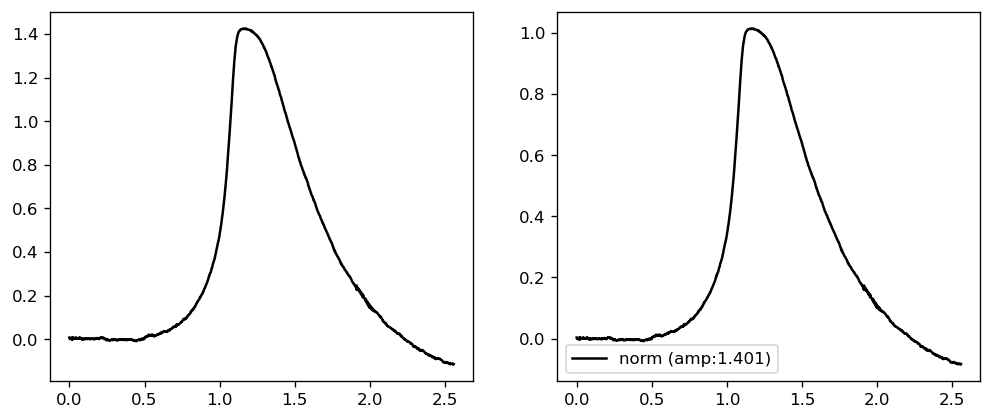

In [174]:
norms22, amps = pulses22.normalize_pulse(return_amp=True)

fig, ax = plt.subplots(1,2,figsize=(10,4), dpi=120)
ax[0].plot(pulses22.time, pulses22.data[j], color='black')
ax[1].plot(pulses22.time, norms22[j], label=f'norm (amp:{amps[j]:.3f})', color='black')
ax[1].legend()

## **find peaks**

### single pulse

In [175]:
pulse22 = Pulse(pulse_data22)
peaks22 = pulse22.count_peaks(height=0.2, prominence=0.2)
peaks22

2

### pulse batch

In [176]:
peakss22 = pulses22.count_peaks(height=0.2, prominence=0.2)
peakss22[j]

2

## **L1 norm**

### single pulse

In [ ]:
pulse_ref22 = Pulse(df22.iloc[26497].values)
l1_norm22 = pulse22.l1_norm(reference_pulse=pulse_ref22)
l1_norm22

19.974588740014205

### pulse batch

In [178]:
l1_norms22 = pulses22.l1_norm(reference_pulse=pulse_ref22)
l1_norms22[j]

19.974588740014205

## **Normalize derivative** ##

### single pulse

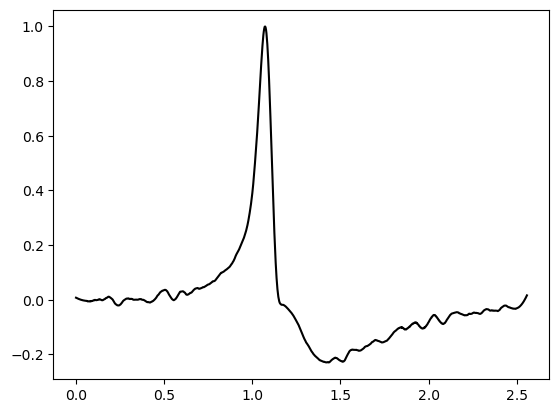

In [ ]:
deriv22 = pulse22.normalize_deriv()
plt.plot(pulse22.time, deriv22, color='black')
plt.show()

### pulse batch

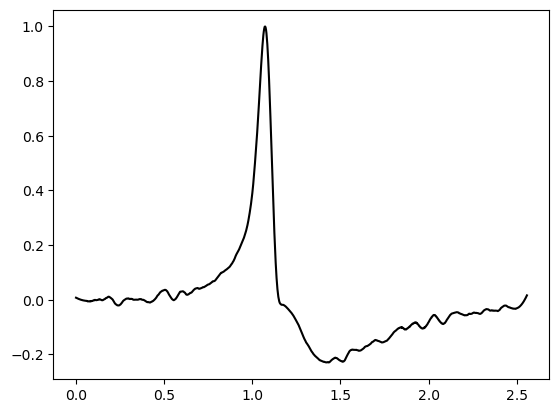

In [180]:
derivs22 = pulses22.normalize_deriv()
plt.plot(pulse22.time, derivs22[j], color='black')
plt.show()

# **Pulse Generator**

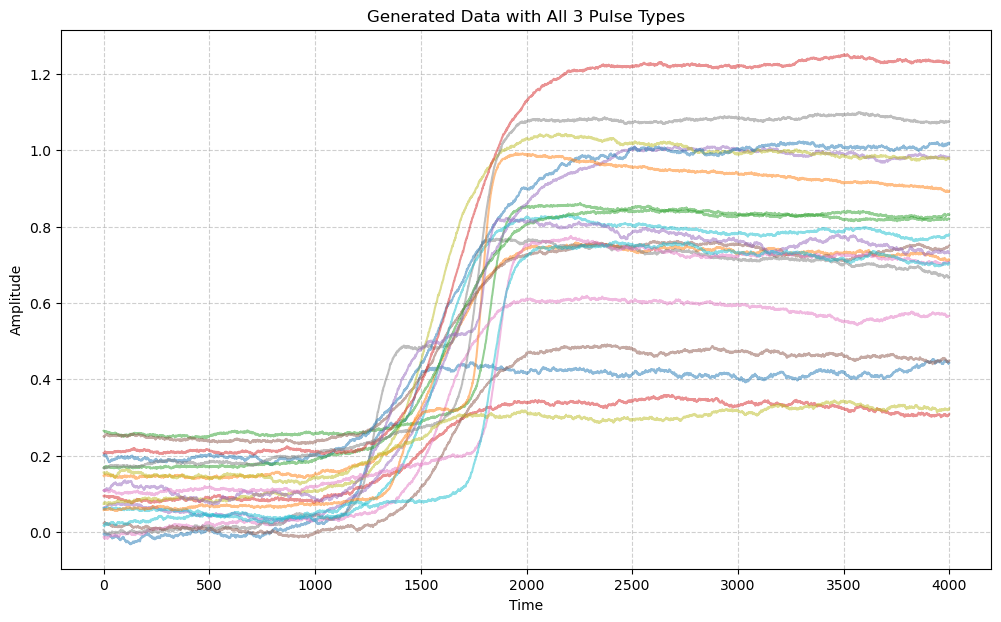

In [181]:
gen = PulseGenerator()
clean_pulses, noisy_pulses = gen.simulate_pulses(N_SAMPLES=4000, WHITE_NOISE_LEVEL = 0.001, COLORED_NOISE_LEVEL = 0.015)

plt.figure(figsize=(12, 7))
plt.title("Generated Data with All 3 Pulse Types")
plt.xlabel("Time")
plt.ylabel("Amplitude")

for i in range(20):
    plt.plot(noisy_pulses[i], alpha=0.5)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()